In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns




In [2]:
# keys are learning rates, all results for now here are using no augmentation

# learning rates (explored over prevliminary runs using size of 0)
lr_strings = ['0.02',  '0.05', '0.08', '0.11', '0.15', '0.20'] 
# numbers of samples used to suppment each of collaborators 1 and 2
sizes = ['0', '1050', '2100', '3150', '4200', '5250'] #, '6300'] #,'7350', '8400']


def get_results_path(lr, supp_size='0', legacy=True):
    # lr and size are strings
    if legacy:
        lr_tag = f"lr_lr_{lr}"
    else:
        lr_tag = f"lr_{lr}"
    return f"federation_results_missing_6_supplement_size_{supp_size}_{lr_tag}.csv"


lr_tuning_rpaths = {_entry: get_results_path(lr=_entry) for _entry in lr_strings}

quicktest_paths = {'0.11': get_results_path(lr='0.11')}

test_over_size_rpaths = {_size: get_results_path(lr='0.11', supp_size=_size) for _size in sizes}

test_over_size_lessclass6_rpaths = {_size: get_results_path(lr='0.11', supp_size=_size, legacy=False) for _size in sizes}




def accumulate_dfs(result_paths, cross_rpath_feature_name):
    """
    result_paths (dict of key to path): paths to the individual results dfs to be accumulated
    cross_rpath_feature_name (str): name of what feature is provided in the keys to the dict in result_paths (examples are 'LearningRate'. 'SupplementSize')
    
    
    The values of the cross path features should be provided as keys to the result_paths
    """
    results_df = None
    for feature_value, path in result_paths.items():
        df_for_value = pd.read_csv(path)
        df_for_value[cross_rpath_feature_name] = feature_value
        if results_df is None:
            results_df = df_for_value
        else:
            results_df = pd.concat([results_df, df_for_value], axis=0)
    return results_df





In [3]:
tuning_results_df = accumulate_dfs(result_paths=lr_tuning_rpaths, 
                                   cross_rpath_feature_name="LearningRate")



In [4]:
tuning_results_df.columns

Index(['Round', 'Location', 'Label', 'Metric', 'Metric Value', 'LearningRate'], dtype='object')

In [5]:
tuning_results_df['Label'].unique()

array(['AVE', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
      dtype=object)

In [6]:
tuning_results_df['Location'].unique()

array(['Col 0', 'Col 1', 'Col 2', 'All'], dtype=object)

In [7]:
tuning_results_df['Metric'].unique()

array(['Loss', 'Aggregated Model Accuracy', 'Local Model Accuracy'],
      dtype=object)

In [8]:
tuning_results_df['Label'].unique()

array(['AVE', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
      dtype=object)

In [9]:
# Ok we're going to plot the col 0 results as it has the most data

<Axes: xlabel='Round', ylabel='Metric Value'>

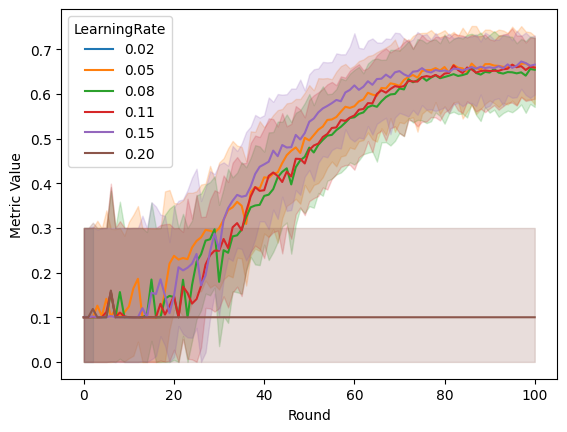

In [10]:
df_col0_agg = tuning_results_df[(tuning_results_df['Location']=='Col 0') & (tuning_results_df['Metric']=='Aggregated Model Accuracy')]
sns.lineplot(df_col0_agg, x='Round', y='Metric Value', hue='LearningRate')

<Axes: xlabel='Round', ylabel='Metric Value'>

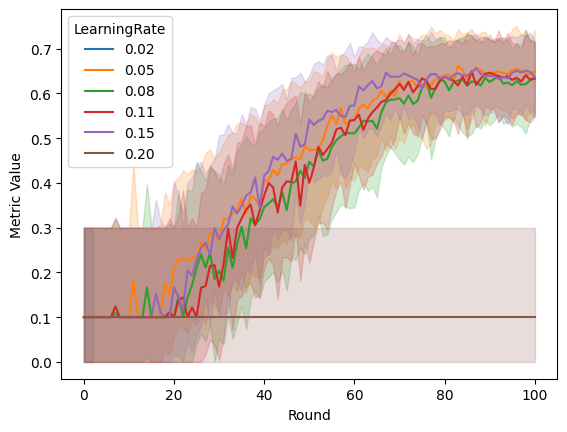

In [11]:
df_col0_loc = tuning_results_df[(tuning_results_df['Location']=='Col 0') & (tuning_results_df['Metric']=='Local Model Accuracy')]
sns.lineplot(df_col0_loc, x='Round', y='Metric Value', hue='LearningRate')

<Axes: xlabel='Round', ylabel='Metric Value'>

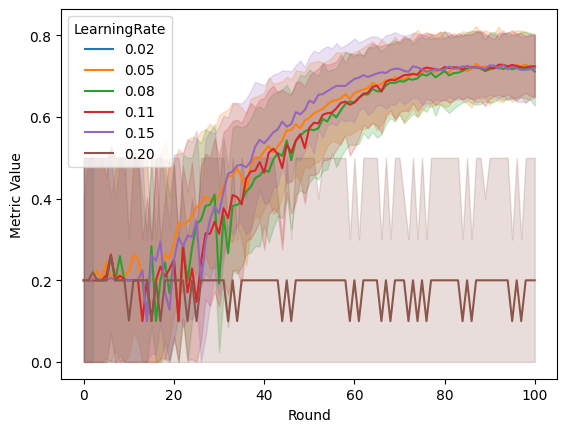

In [12]:
df_col0_agg = tuning_results_df[(tuning_results_df['Location']=='Col 2') & (tuning_results_df['Metric']=='Aggregated Model Accuracy')]
sns.lineplot(df_col0_agg, x='Round', y='Metric Value', hue='LearningRate')

In [13]:
# Looks like lr=0.11 is the way to go

In [14]:
quicktest_results_df = accumulate_dfs(result_paths=quicktest_paths, 
                                   cross_rpath_feature_name="LearningRate")

In [15]:
quicktest_results_df.columns

Index(['Round', 'Location', 'Label', 'Metric', 'Metric Value', 'LearningRate'], dtype='object')

In [16]:
quicktest_results_df['Location'].unique()

array(['Col 0', 'Col 1', 'Col 2', 'All'], dtype=object)

In [17]:
quicktest_results_df['Label'].unique()

array(['AVE', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
      dtype=object)

<Axes: xlabel='Round', ylabel='Metric Value'>

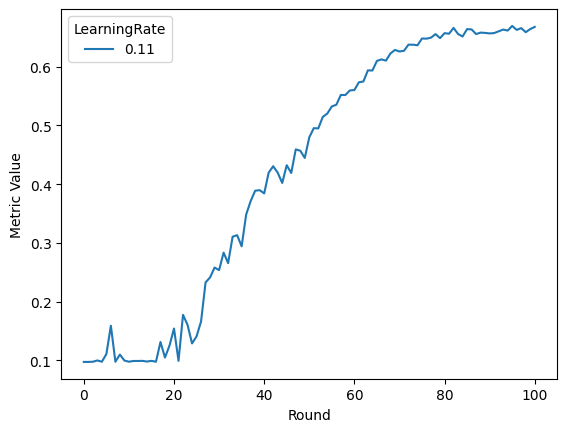

In [18]:
df_All_agg = quicktest_results_df[(quicktest_results_df['Location']=='All') & (quicktest_results_df['Metric']=='Aggregated Model Accuracy') & (quicktest_results_df['Label']=='AVE')]
sns.lineplot(df_All_agg, x='Round', y='Metric Value', hue='LearningRate')

In [19]:
# Final test considering diffrent augmentation sizes for the same learning rate (0.11)

In [20]:
aug_size_results_df = accumulate_dfs(result_paths=test_over_size_rpaths, 
                                   cross_rpath_feature_name="AugmentationSize")

<Axes: xlabel='Round', ylabel='Metric Value'>

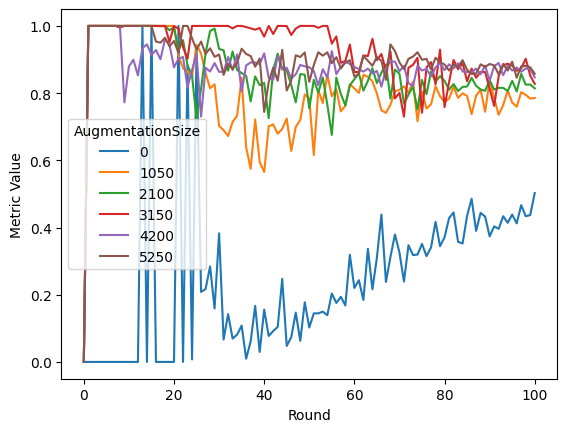

In [21]:
size_df_All_agg = aug_size_results_df[(aug_size_results_df['Location']=='Col 0') & 
                                      (aug_size_results_df['Metric']=='Aggregated Model Accuracy') & 
                                      (aug_size_results_df['Label']=='6')]
sns.lineplot(size_df_All_agg, x='Round', y='Metric Value', hue='AugmentationSize')

<Axes: xlabel='Round', ylabel='Metric Value'>

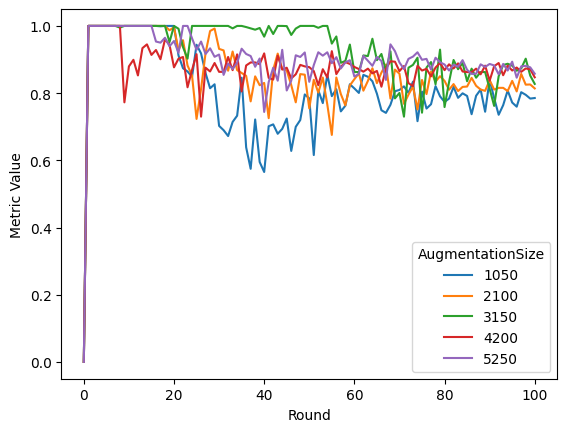

In [22]:
size_df_All_agg = aug_size_results_df[(aug_size_results_df['Location']=='Col 0') & 
                                      (aug_size_results_df['Metric']=='Aggregated Model Accuracy') & 
                                      (aug_size_results_df['Label']=='6') & 
                                      (aug_size_results_df['AugmentationSize']!='0')]
sns.lineplot(size_df_All_agg, x='Round', y='Metric Value', hue='AugmentationSize')

<Axes: xlabel='Round', ylabel='Metric Value'>

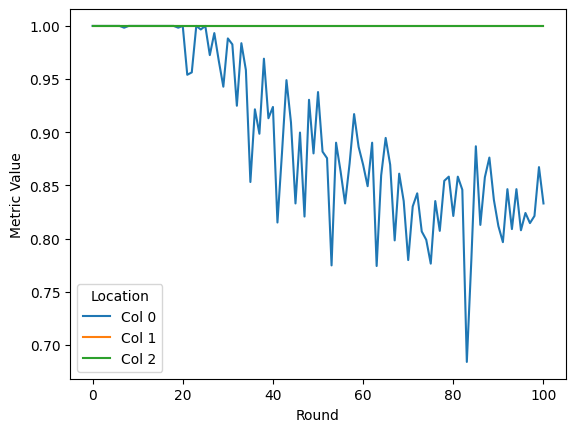

In [23]:
size_df_All_agg = aug_size_results_df[(aug_size_results_df['Metric']=='Local Model Accuracy') & 
                                      (aug_size_results_df['Label']=='6') & 
                                      (aug_size_results_df['AugmentationSize']=='0')]
sns.lineplot(size_df_All_agg, x='Round', y='Metric Value', hue='Location')

In [24]:
size_df_All_agg = aug_size_results_df[(aug_size_results_df['Metric']=='Local Model Accuracy') & 
                                      (aug_size_results_df['Label']=='6') & 
                                      (aug_size_results_df['AugmentationSize']=='0') & 
                                      (aug_size_results_df['Round']==1)]
size_df_All_agg.head()

,Round,Location,Label,Metric,Metric Value,AugmentationSize
88,1,Col 0,6,Local Model Accuracy,1.0,0
109,1,Col 1,6,Local Model Accuracy,1.0,0
130,1,Col 2,6,Local Model Accuracy,1.0,0


<Axes: >

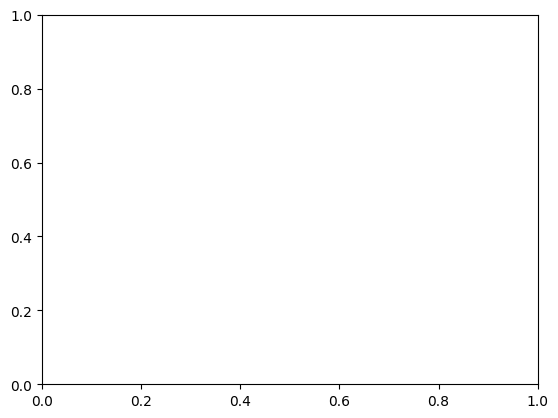

In [ ]:
size_df_All_agg = aug_size_results_df[(aug_size_results_df['Location']=='6') & (aug_size_results_df['Metric']=='Aggregated Model Accuracy') & (aug_size_results_df['Label']=='6')]
sns.lineplot(size_df_All_agg, x='Round', y='Metric Value', hue='AugmentationSize')

In [26]:
# Repeat final test (diffrent augmentation sizes for the same learning rate of 0.11) this time limiting the number of class
# 6 examples present for col 0 so as to not allow such quick learning of class 6 there

In [27]:
aug_size_results_df = accumulate_dfs(result_paths=test_over_size_lessclass6_rpaths, 
                                   cross_rpath_feature_name="AugmentationSize")

<Axes: xlabel='Round', ylabel='Metric Value'>

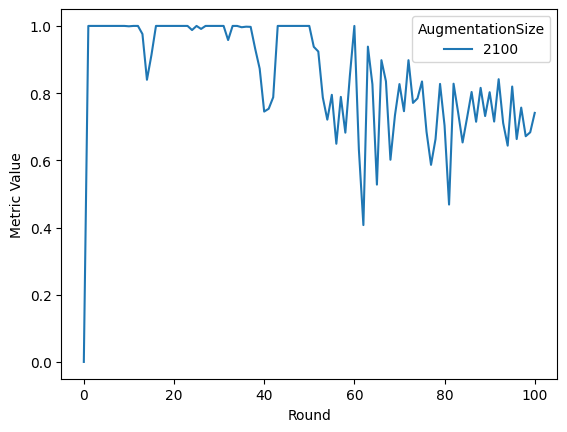

In [28]:
size_df_All_agg = aug_size_results_df[(aug_size_results_df['Location']=='Col 0') & 
                                      (aug_size_results_df['Metric']=='Aggregated Model Accuracy') & 
                                      (aug_size_results_df['Label']=='6') & 
                                      (aug_size_results_df['AugmentationSize']=='2100')]
sns.lineplot(size_df_All_agg, x='Round', y='Metric Value', hue='AugmentationSize')

<Axes: xlabel='Round', ylabel='Metric Value'>

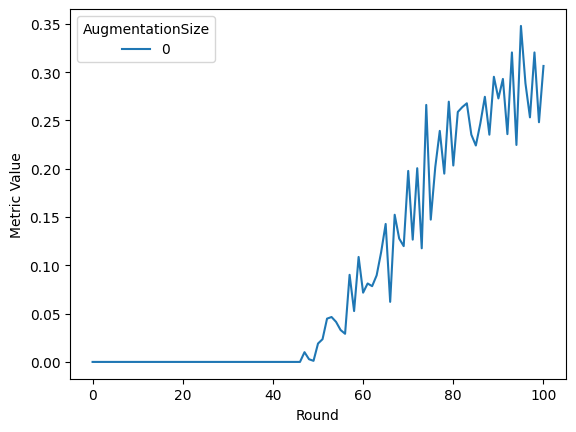

In [29]:
size_df_All_agg = aug_size_results_df[(aug_size_results_df['Location']=='Col 0') & 
                                      (aug_size_results_df['Metric']=='Aggregated Model Accuracy') & 
                                      (aug_size_results_df['Label']=='6') & 
                                      (aug_size_results_df['AugmentationSize']=='0')]
sns.lineplot(size_df_All_agg, x='Round', y='Metric Value', hue='AugmentationSize')

<Axes: xlabel='Round', ylabel='Metric Value'>

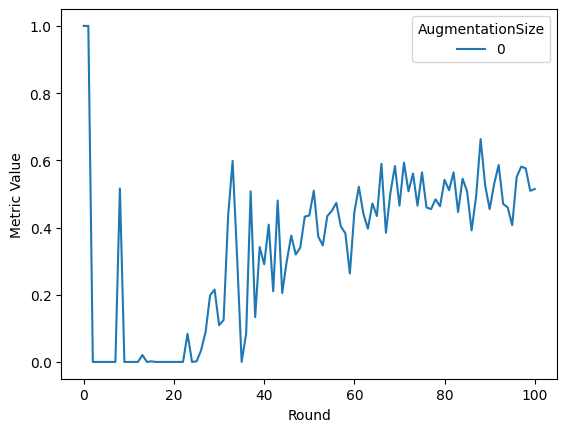

In [30]:
size_df_All_agg = aug_size_results_df[(aug_size_results_df['Location']=='Col 0') & 
                                      (aug_size_results_df['Metric']=='Aggregated Model Accuracy') & 
                                      (aug_size_results_df['Label']=='5') & 
                                      (aug_size_results_df['AugmentationSize']=='0')]
sns.lineplot(size_df_All_agg, x='Round', y='Metric Value', hue='AugmentationSize')

<Axes: xlabel='Round', ylabel='Metric Value'>

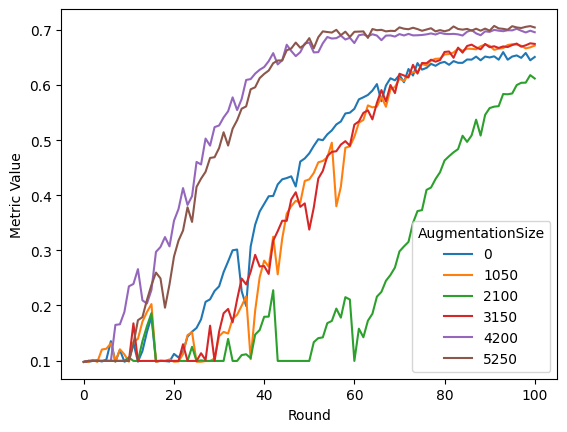

In [40]:
size_df_All_agg = aug_size_results_df[(aug_size_results_df['Location']=='All') & 
                                      (aug_size_results_df['Metric']=='Aggregated Model Accuracy') & 
                                      (aug_size_results_df['Label']=='AVE')]
sns.lineplot(size_df_All_agg, x='Round', y='Metric Value', hue='AugmentationSize')

<Axes: >

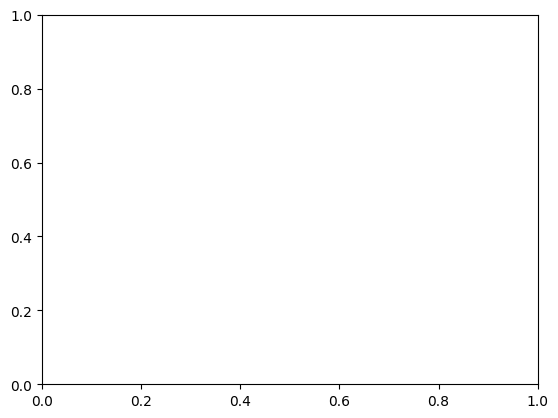

In [36]:
size_df_All_agg = aug_size_results_df[(aug_size_results_df['Location']=='Col 0') & 
                                      (aug_size_results_df['Metric']=='Aggregated Model Accuracy') & 
                                      (aug_size_results_df['Label']=='All')]
sns.lineplot(size_df_All_agg, x='Round', y='Metric Value', hue='AugmentationSize')